<a href="https://colab.research.google.com/github/AndreMarcato/Planerg_2023/blob/main/Series_Sinteticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
!pip install PySDDP


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\leand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [320]:
from PySDDP.Pen import Newave
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from random import randint
import os

In [321]:
# Caminho do Newave com os dados publicados em agosto

Caminho = './NW202308_UNSI_ACL'

PMOSET2023 = Newave(Caminho)
print(os.listdir(Caminho))

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.
['ADTERM.DAT', 'AGRINT.DAT', 'ARQUIVOS.DAT', 'BID.DAT', 'CASO.DAT', 'CDEFVAR.DAT', 'CLAST.DAT', 'CONFHD.DAT', 'CONFT.DAT', 'CURVA.DAT', 'CVAR.DAT', 'C_ADIC.DAT', 'DGER.DAT', 'DSVAGUA.DAT', 'ELNINO.DAT', 'ENSOAUX.DAT', 'EXPH.DAT', 'EXPT.DAT', 'FORMAT.TMP', 'GHMIN.DAT', 'GTMINPAT.DAT', 'GTMIN_CCEE_082023.xlsx', 'HIDR.DAT', 'ITAIPU.DAT', 'LOSS.DAT', 'MANUTT.DAT', 'MENSAG.TMP', 'MODIF.DAT'

dict_keys(['codigo', 'nome', 'posto', 'ree', 'vol_ini', 'status', 'modif', 'ano_i', 'ano_f', 'bdh', 'sist', 'empr', 'jusante', 'desvio', 'vol_min', 'vol_max', 'vol_vert', 'vol_min_desv', 'cota_min', 'cota_max', 'pol_cota_vol', 'pol_cota_area', 'coef_evap', 'num_conj_maq', 'maq_por_conj', 'pef_por_conj', 'cf_hbqt', 'cf_hbqt_2', 'cf_hbqt_3', 'cf_hbqt_4', 'cf_hbqt_5', 'cf_hbqg', 'cf_hbqg_2', 'cf_hbqg_3', 'cf_hbqg_4', 'cf_hbqg_5', 'cf_hbpt', 'cf_hbpt_2', 'cf_hbpt_3', 'cf_hbpt_4', 'cf_hbpt_5', 'alt_efet_conj', 'vaz_efet_conj', 'prod_esp', 'perda_hid', 'num_pol_vnj', 'pol_vaz_niv_jus', 'pol_vaz_niv_jus_2', 'pol_vaz_niv_jus_3', 'pol_vaz_niv_jus_4', 'pol_vaz_niv_jus_5', 'cota_ref_nivel_jus', 'cfmed', 'inf_canal_fuga', 'fator_carga_max', 'fator_carga_min', 'vaz_min', 'unid_base', 'tipo_turb', 'repres_conj', 'teifh', 'ip', 'tipo_perda', 'data', 'observ', 'vol_ref', 'tipo_reg', 'vazoes', 'vol_mint', 'vol_maxt', 'vol_minp', 'vaz_mint', 'cmont', 'cfugat', 'vol_util', 'pot_efet', 'vaz_efet', 'status

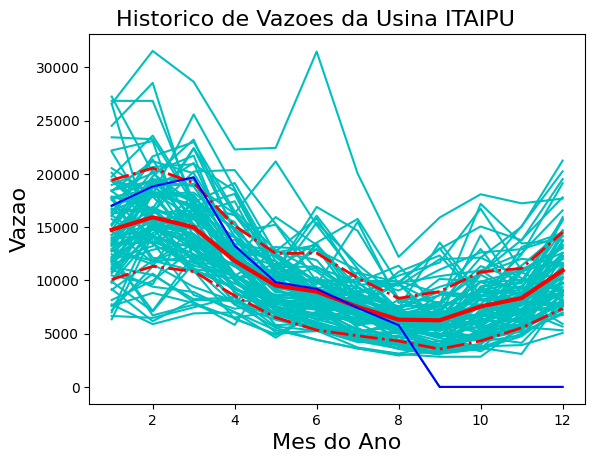

In [322]:
# Solicita ao usuário que insira a usina
usina = input("Digite o nome da Usina: ")

Usina = PMOSET2023.confhd.get(usina)

print(Usina.keys())
print(Usina['vazoes'])
print(np.shape(Usina['vazoes']))

PMOSET2023.confhd.plot_vaz(Usina)

In [323]:
from cvxopt import matrix, solvers

mes = int(input('Mês para estipulação: '))
meses = int(input('Número de meses Base (máx 12): '))
vaz_atual = np.array(Usina['vazoes'][years+1]) # Afluencias históricas do ano atual
mes=mes-1
mes_saida = 8
mes_desejado = mes

mes=mes_saida

while (mes_desejado>=mes):

    mes_inicial = mes - meses
    mi=mes_inicial
    years = np.shape(Usina['vazoes'])[0]-2
    identidade = np.eye(years)


    if (mes_inicial<0):
        mes_inicial += 12
        identidade = np.eye(years-1)

    if (mes==0):
        recorte = Usina['vazoes'][0:years-1,mes_inicial:12]
        Aeq = np.concatenate((recorte, identidade), axis = 1)
        Beq = Usina['vazoes'][0:years-1,mes:mes+1]


    elif (mes < meses):
        recorte = Usina['vazoes'][0:years-1,mes_inicial:12]
        recorte2 = Usina['vazoes'][1:years,0:mes]
        Aeq = np.concatenate((recorte, recorte2, identidade), axis = 1)
        Beq = Usina['vazoes'][0:years-1,mes:mes+1]


    else:
        recorte = Usina['vazoes'][0:years,mes_inicial:mes]
        Aeq = np.concatenate((recorte, identidade), axis = 1)
        Aeq = matrix(Aeq)
        Beq = Usina['vazoes'][0:years,mes:mes+1]
        

    Aeq = matrix(Aeq)
    Beq = matrix(Beq)*1.0

    if mi<0:
        q = matrix(np.zeros(years+meses-1))
        P = 2*np.eye(years+meses-1)
        A = matrix(0.0, (0,years+meses-1))
    else:
        q = matrix(np.zeros(years+meses))
        P = 2*np.eye(years+meses)
        A = matrix(0.0, (0,years+meses))

    for i in range(0,meses):
        P[i][i] = 0

    #for i in range(meses,years+1):
    #    P[i][i] *= ((i+meses)/meses)

    P = matrix(P)
    B = matrix(0.0, (0,1))

    solvers.options['show_progress'] = False
    abstol = 1e-9
    reltol = 1e-9
    print(np.shape(Beq))
    # sol = solvers.qp(P, q, A.T, B, Aeq.T, Beq, abstol=abstol, reltol=reltol)
    # sol = solvers.qp(P, q, G=-A.T, h=-B, A=Aeq.T, b=Beq, kktsolver='ldl', abstol=abstol, reltol=reltol)
    # sol = solvers.qp(P, q, G=-A.T, h=B, A=Aeq.T, b=Beq, kktsolver='ldl', abstol=abstol, reltol=reltol)
    sol = solvers.qp(P, q, A, B, A=Aeq, b=Beq, abstol=abstol, reltol=reltol)
    erros = sol['x'][meses:]
    coeficientes = sol['x'][:meses]

    # Os dados abaixo são importantes pois permitem o a estimação das afluências desejadas através de afluências históricas e coeficientes calculados
    vaz_anterior = np.array(Usina['vazoes'][years]) + vaz_atual # Afluencias históricas do ano anterior

    print(vaz_atual)
    vaz=0
    # Esse loop é responsável por cálcular as vazões do mês atual que se deseja, com os coeficientes obtidos através do solver
    for i in range(meses):  
        if (mes==0): #se o mês de análise for janeiro
            vaz += coeficientes[i]*vaz_anterior[mes_inicial:12][i]
        elif (mes < meses): # se o número de meses de base for maior que o mês de análise (precisa de vazões de anos anteriores)
            if i < (meses - mes):
                vaz += coeficientes[i]*vaz_anterior[mes_inicial:12][i]
            else:
                vaz += coeficientes[i]*vaz_atual[0:mes][i-meses+mes]
        else:   # se o número de meses base for menor que o mês de análise (precisou-se de vazoes apenas do ano em questão)
            vaz += coeficientes[i]*vaz_atual[mes_inicial:mes][i]
    vaz_atual[mes] = vaz
    print(vaz_atual)
    mes += 1
print(vaz_atual)

(91, 1)
[17009 18819 19669 13245  9830  9216  7415  5797     0     0     0     0]
[17009 18819 19669 13245  9830  9216  7415  5797  5788     0     0     0]
(91, 1)
[17009 18819 19669 13245  9830  9216  7415  5797  5788     0     0     0]
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080     0     0]
(91, 1)
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080     0     0]
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080  7759     0]
(91, 1)
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080  7759     0]
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080  7759 10076]
[17009 18819 19669 13245  9830  9216  7415  5797  5788  7080  7759 10076]


In [324]:
""" from scipy.optimize import minimize

recorte = Usina['vazoes'][0:91, 4:7]
identidade = np.eye(91)

Aeq = np.concatenate((recorte, identidade), axis=1)
Beq = Usina['vazoes'][0:91, 7:8]


# Função objetivo
def objective(x):
    y=x
    y[0]=x[0]
    y[1]=x[1]
    y[2]=x[2]
    for i in range(3, 94):
        y[i] = abs(x[i])
    return 0.5 * np.dot(y, np.dot(P, y))

# Restrições de igualdade
def constraint_eq(x):
    return np.dot(Aeq, x) - Beq.flatten()  # Flattening Beq to match dimensions

x0 = np.zeros(94)  # Chute inicial

# Resolvendo o problema de otimização
result = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint_eq})
coeficientes = result.x[:3]

erros = result.x[3:]
print(erros)
erros = erros.reshape((91, 1))
print("Coeficientes:", coeficientes)
print("Erros:", erros) """


' from scipy.optimize import minimize\n\nrecorte = Usina[\'vazoes\'][0:91, 4:7]\nidentidade = np.eye(91)\n\nAeq = np.concatenate((recorte, identidade), axis=1)\nBeq = Usina[\'vazoes\'][0:91, 7:8]\n\n\n# Função objetivo\ndef objective(x):\n    y=x\n    y[0]=x[0]\n    y[1]=x[1]\n    y[2]=x[2]\n    for i in range(3, 94):\n        y[i] = abs(x[i])\n    return 0.5 * np.dot(y, np.dot(P, y))\n\n# Restrições de igualdade\ndef constraint_eq(x):\n    return np.dot(Aeq, x) - Beq.flatten()  # Flattening Beq to match dimensions\n\nx0 = np.zeros(94)  # Chute inicial\n\n# Resolvendo o problema de otimização\nresult = minimize(objective, x0, constraints={\'type\': \'eq\', \'fun\': constraint_eq})\ncoeficientes = result.x[:3]\n\nerros = result.x[3:]\nprint(erros)\nerros = erros.reshape((91, 1))\nprint("Coeficientes:", coeficientes)\nprint("Erros:", erros) '

In [325]:

erro_tot =  Beq + erros
erro_total=0
for i in range(0, 91):
        erro_total = np.sqrt((erro_total**2) + (erros[i]**2))
print(erro_total)

22106.906245604772


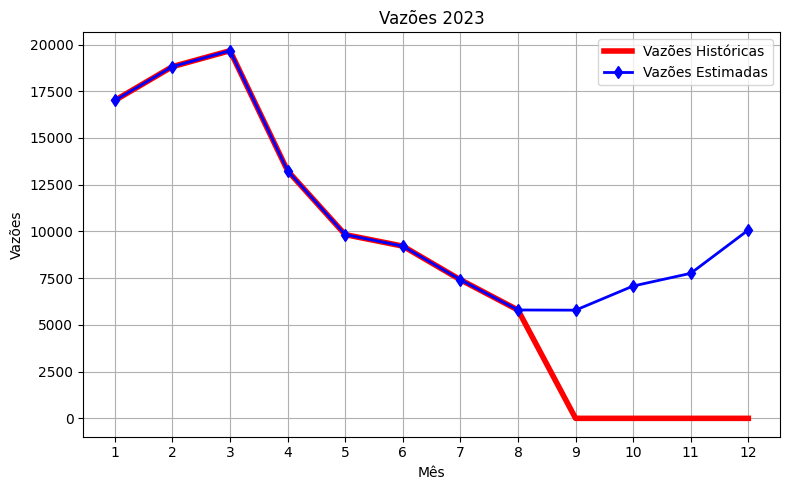

In [326]:
x = np.arange(0,12,1)


plt.figure(figsize=(8,5))


plt.plot(x+1, Usina['vazoes'][92,:],color='r',linewidth=4.0,label='Vazões Históricas')
plt.plot(x+1, vaz_atual, marker='d',color='b',linewidth=2.0,label='Vazões Estimadas')
plt.title("Vazões 2023")
plt.xlabel("Mês")
plt.ylabel("Vazões")
plt.xticks(x+1)
plt.grid()
plt.legend()
plt.tight_layout()